# Pymaceuticals Inc.
---

### Analysis

In this study, a total of 249 unique mice were treated with various drug regimens, such as Capomulin, Ramicane, Propriva, Infubinol, etc., with primarily equal drugs amount for the mice. The gender distribution was relatively balanced, with 124 female mice and 125 male mice. A strong positive correlation (correlation coefficient: 0.84) was found between mouse weight and the average tumor volume in the Capomulin regimen, indicating that as mouse weight increases, average tumor volume also increases. The regression analysis showed that mouse weight can predict around 70% of the variability in average tumor volume, providing insights into the impact of mouse weight on tumor growth. Comparing treatments, both Capomulin and Ramicane demonstrated better results in reducing tumor size, suggesting their potential effectiveness in treating the condition compared to other regimens in the study. Overall, these findings contribute to a deeper understanding of the relationship between drug regimens, mouse weight, and tumor growth in the context of the selected treatments.
 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()
num_mice_clean

249

## Summary Statistics

In [34]:
# Grouping the data by drug regimen
grouped_data = clean_data.groupby('Drug Regimen')

# Calculate the required summary statistics for tumor volume
summary_df = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Renaming the columns for clarity
summary_df = summary_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance of Tumor Volume',
    'std': 'Standard Deviation of Tumor Volume',
    'sem': 'SEM of Tumor Volume'
})

# Displaying the summary DataFrame
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# Grouping the data by drug regimen and calculating summary statistics in a single line
summary_df = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume=np.mean,
    Median_Tumor_Volume=np.median,
    Variance_of_Tumor_Volume=np.var,
    Standard_Deviation_of_Tumor_Volume=np.std,
    SEM_of_Tumor_Volume=np.std
)

# Displaying the summary DataFrame
summary_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_of_Tumor_Volume,Standard_Deviation_of_Tumor_Volume,SEM_of_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003,7.821003
Propriva,52.393463,50.909965,43.138803,6.568014,6.568014
Ramicane,40.216745,40.673236,23.486704,4.846308,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419,7.710419


## Bar and Pie Charts

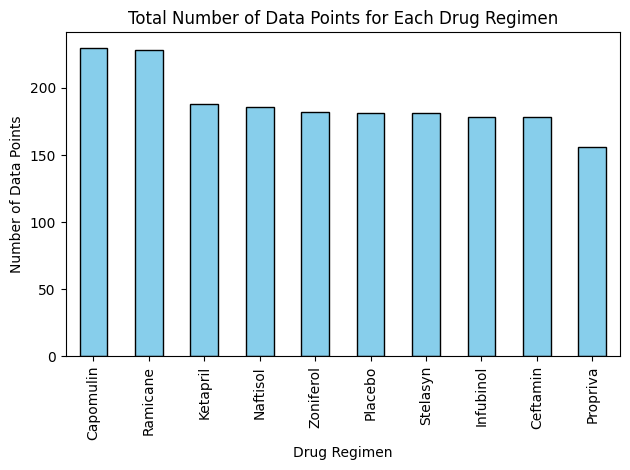

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Grouping the data by drug regimen and counting the number of rows (Mouse ID/Timepoints) for each regimen
drug_counts = clean_data['Drug Regimen'].value_counts()

# Creating the bar plot
drug_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Total Number of Data Points for Each Drug Regimen')

# Displaying the plot
plt.tight_layout()
plt.show()

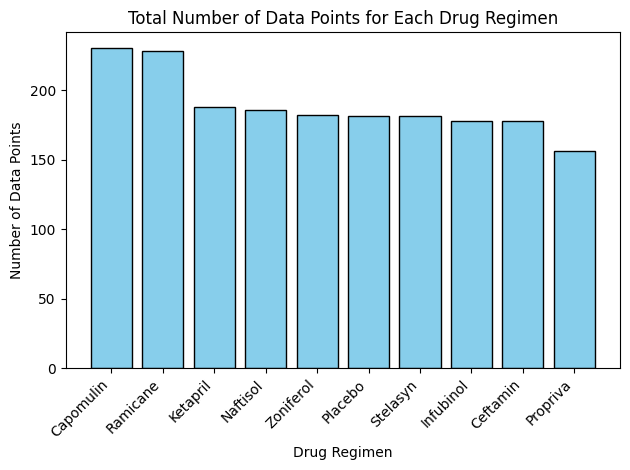

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_data['Drug Regimen'].value_counts()

# Creating the bar plot using pyplot
plt.bar(drug_counts.index, drug_counts.values, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Total Number of Data Points for Each Drug Regimen')

# Rotating x-axis labels for better visibility (optional)
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

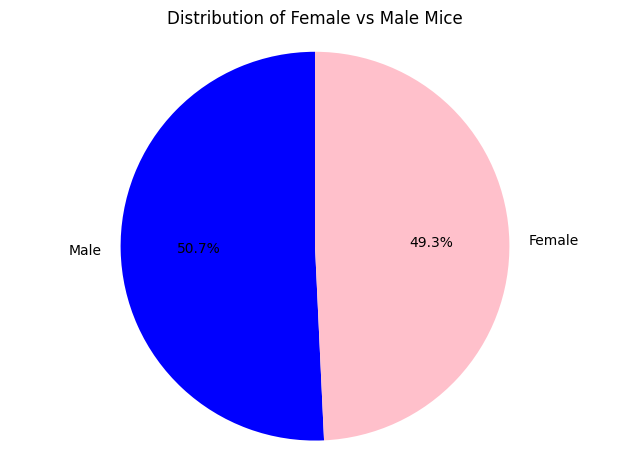

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()

# Creating the pie plot using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)

# Adding title and axis labels (optional)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')  # To remove the default 'Sex' label on the y-axis

# Displaying the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.tight_layout()
plt.show()

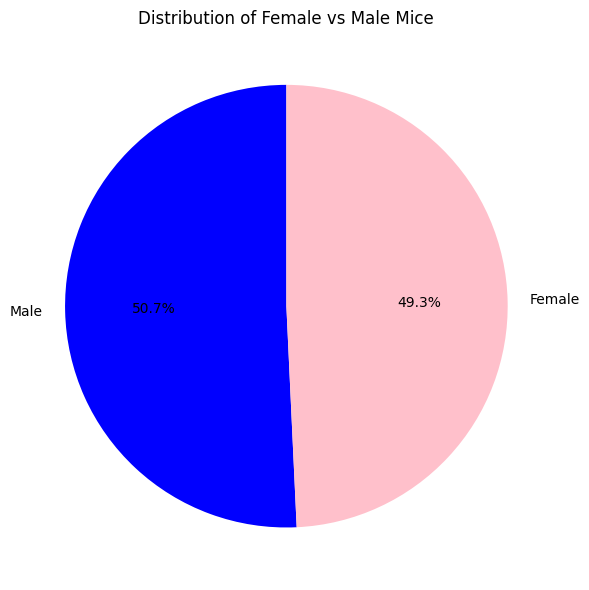

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data['Sex'].value_counts()

# Creating the pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)

# Adding title
plt.title('Distribution of Female vs Male Mice')

# Displaying the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'])

# Filter the DataFrame to include only the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the DataFrame with the final tumor volume for each mouse in the four treatments
four_treatments


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [97]:
df = four_treatments

# Put treatments into a list for the for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = four_treatments.loc[four_treatments['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Check if the tumor_vols list is not empty before calculating IQR
    if not tumor_vols.empty:
        # Calculate the IQR
        q1 = np.percentile(tumor_vols, 25)
        q3 = np.percentile(tumor_vols, 75)
        iqr = q3 - q1

        # Determine outliers using upper and lower bounds
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = tumor_vols.loc[(tumor_vols < lower_bound) | (tumor_vols > upper_bound)]

        # Print potential outliers for each treatment
        if outliers.empty:
            print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
        else:
            print(f"{treatment}'s potential outliers:\n{outliers}")
    else:
        print(f"No data points for {treatment}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


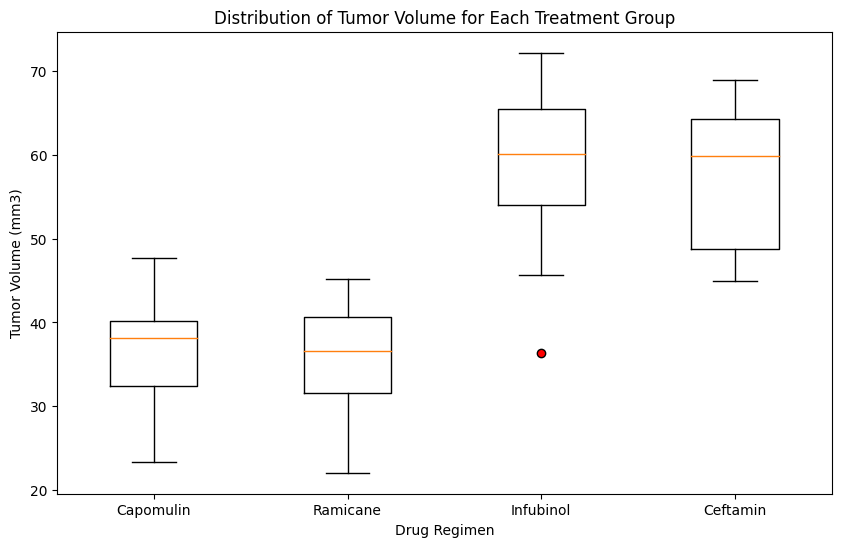

In [114]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_by_treatment, labels=treatments, flierprops=dict(markerfacecolor='red', marker='o'))

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

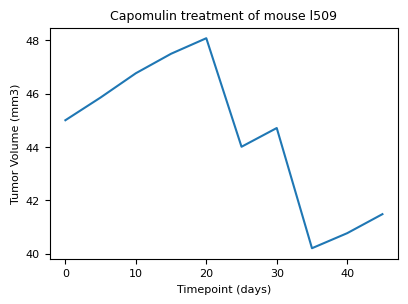

In [116]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")]
Capomulin_df = clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")]
Capomulin_df.loc[clean_data["Mouse ID"]=="l509"]\
.plot.line(x="Timepoint", y="Tumor Volume (mm3)",figsize=(4.5,3),
           fontsize=8, legend=False)
plt.title("Capomulin treatment of mouse l509" ,fontsize=9)
plt.xlabel("Timepoint (days)", fontsize=8)
plt.ylabel("Tumor Volume (mm3)", fontsize=8)
plt.show()

/var/folders/m0/d3_skgfx307_wfhf8rf_9_nm0000gn/T/ipykernel_78010/2393726491.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_df_mean = Capomulin_df.groupby(["Mouse ID", "Age_months"], as_index=False).mean()


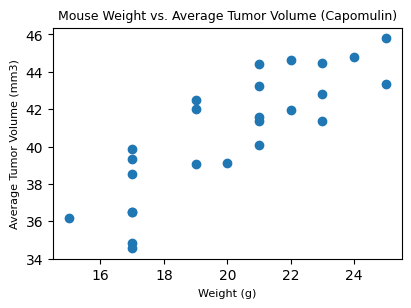

In [119]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df_mean = Capomulin_df.groupby(["Mouse ID", "Age_months"], as_index=False).mean()

plt.figure(figsize=(4.5, 3))
plt.scatter(Capomulin_df_mean["Weight (g)"], Capomulin_df_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)", fontsize=8)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=8)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize=9)

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


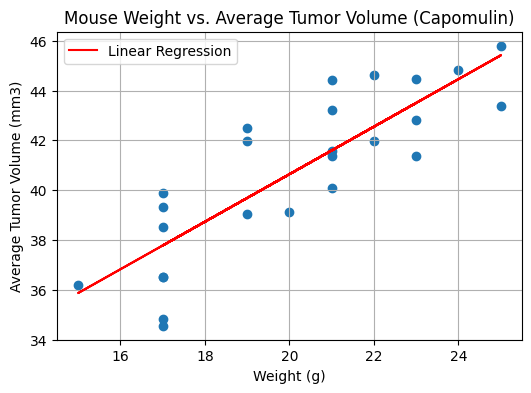

In [138]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = Capomulin_df_mean["Weight (g)"]
tumor_volume = Capomulin_df_mean["Tumor Volume (mm3)"]
correlation_coefficient = st.pearsonr(weight, tumor_volume)[0]

plt.figure(figsize=(6, 4))
plt.scatter(weight, tumor_volume)
plt.plot(weight, slope * weight + intercept, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel("Weight (g)", fontsize=10)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=10)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize=12)

# Add correlation coefficient and regression equation to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient, 2)}")

plt.legend()
plt.grid(True)
plt.show()

